----------------------------------------------------------------------------------------------------------------------------------------------------------
#A4

Preview of data:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1    

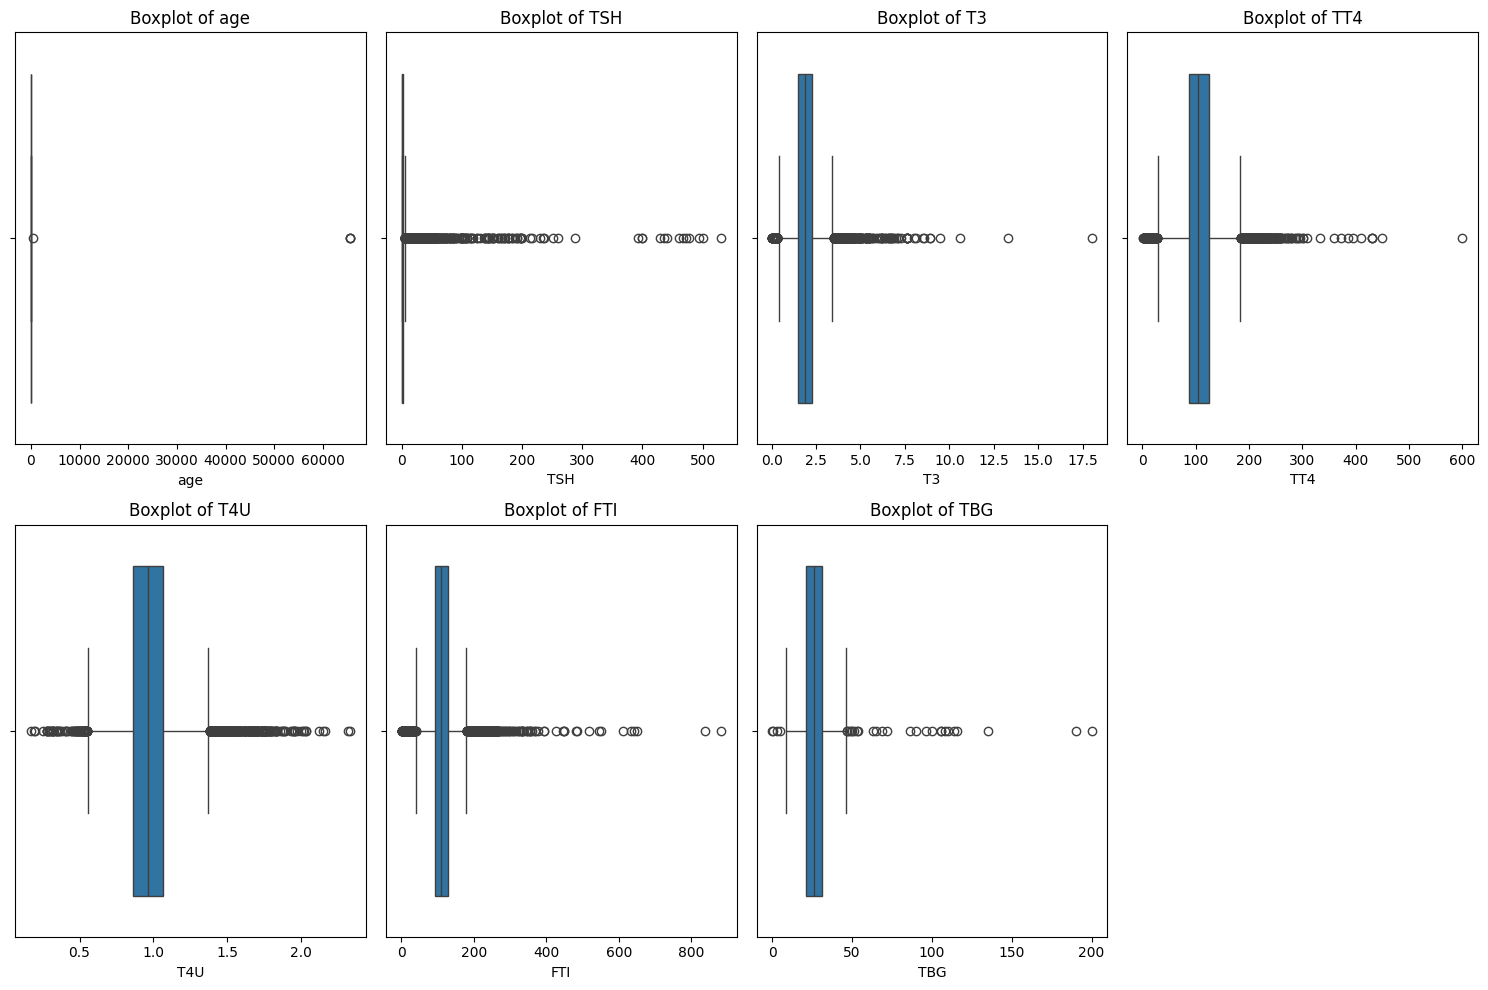


Mean and Standard Deviation (Numeric Columns):
age: Mean = 73.56, StdDev = 1183.91
TSH: Mean = 5.22, StdDev = 24.18
T3: Mean = 1.97, StdDev = 0.89
TT4: Mean = 108.70, StdDev = 37.52
T4U: Mean = 0.98, StdDev = 0.20
FTI: Mean = 113.64, StdDev = 41.55
TBG: Mean = 29.87, StdDev = 21.05


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')

# Display structure and first few rows
print("Preview of data:")
print(df.head())

#Data Type Identification
print("\nData Types of Columns:")
print(df.dtypes)

# Manual classification based on inspection:
nominal_cols = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
                'FTI measured', 'TBG measured', 'referral source', 'Condition']

numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

#Proposed Encoding Scheme
print("\nEncoding Suggestions:")
encoding_suggestions = {col: 'OneHot' for col in nominal_cols}  # all nominal fields -> one-hot
encoding_suggestions['Condition'] = 'LabelEncoding'  # ordinal-style classes
for attr, enc in encoding_suggestions.items():
    print(f"{attr}: {enc}")

#Data Range for Numeric Variables
print("\nData Ranges for Numeric Fields:")
for col in numeric_cols:
    if df[col].dtype != object:
        print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")
    else:
        print(f"{col} (non-numeric, needs cleaning)")

#Missing Value Analysis
print("\nMissing Value Count per Column:")
missing_counts = df.isin(['?', None]).sum()
print(missing_counts[missing_counts > 0])

#Optionally convert '?' to NaN
df.replace('?', np.nan, inplace=True)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # convert to numeric

#Outlier Detection via Boxplot
print("\nShowing outlier boxplots for numeric features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#Mean and Variance of Numeric Variables
print("\nMean and Standard Deviation (Numeric Columns):")
for col in numeric_cols:
    col_data = df[col].dropna()
    mean_val = np.mean(col_data)
    std_dev = np.std(col_data)
    print(f"{col}: Mean = {mean_val:.2f}, StdDev = {std_dev:.2f}")


----------------------------------------------------------------------------------------------------------------------------------------------------------
#A5

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')

#Identify truly binary columns (only 't' and 'f') by scanning unique values
binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    cleaned = set(str(val).strip().lower() for val in unique_vals)
    if cleaned.issubset({'t', 'f'}):
        binary_cols.append(col)

#Filter ONLY binary columns where both rows have valid 't' or 'f'
valid_binary_cols = []
for col in binary_cols:
    val1 = str(df.loc[0, col]).strip().lower()
    val2 = str(df.loc[1, col]).strip().lower()
    if val1 in {'t', 'f'} and val2 in {'t', 'f'}:
        valid_binary_cols.append(col)

#Extract the two valid vectors and encode: 't' → 1, 'f' → 0
doc1 = df.loc[0, valid_binary_cols].apply(lambda x: 1 if str(x).strip().lower() == 't' else 0)
doc2 = df.loc[1, valid_binary_cols].apply(lambda x: 1 if str(x).strip().lower() == 't' else 0)

#Compute pairwise match counts
f11 = int(((doc1 == 1) & (doc2 == 1)).sum())
f00 = int(((doc1 == 0) & (doc2 == 0)).sum())
f10 = int(((doc1 == 1) & (doc2 == 0)).sum())
f01 = int(((doc1 == 0) & (doc2 == 1)).sum())

#Compute Jaccard & SMC safely
jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
smc = (f11 + f00) / (f11 + f00 + f10 + f01)

# Output
print("\nBinary Columns Used:", valid_binary_cols)
print(f"Jaccard Coefficient: {jc:.3f}")
print(f"Simple Matching Coefficient: {smc:.3f}")

if jc < smc:
    print("SMC is higher because it includes both agreements (1-1 and 0-0), while JC focuses only on shared '1's.")



Binary Columns Used: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
Jaccard Coefficient: 0.250
Simple Matching Coefficient: 0.850
SMC is higher because it includes both agreements (1-1 and 0-0), while JC focuses only on shared '1's.


----------------------------------------------------------------------------------------------------------------------------------------------------------
#A6

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')

# Handle missing values: Replace '?' with np.nan
df.replace('?', np.nan, inplace=True)

# Prepare a copy for encoding/filling
features = df.copy()

# Identify categorical and numeric columns
categorical_cols = features.select_dtypes(include=['object']).columns
numeric_cols = features.select_dtypes(include=[np.number]).columns

# Fill missing numeric values with column mean
for col in numeric_cols:
    features[col] = features[col].astype(float)
    features[col] = features[col].fillna(features[col].mean())

# Label-encode all categorical columns (for cosine, any deterministic encoding is OK)
le_dict = {}
for col in categorical_cols:
    features[col] = features[col].fillna(features[col].mode()[0])
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    le_dict[col] = le

# Now extract the feature vectors for the first 2 observations
vec1 = features.iloc[0].values.reshape(1, -1)
vec2 = features.iloc[1].values.reshape(1, -1)

# Compute cosine similarity
cos_sim = cosine_similarity(vec1, vec2)[0][0]

print(f"Cosine Similarity : {cos_sim:.4f}")


Cosine Similarity : 1.0000


----------------------------------------------------------------------------------------------------------------------------------------------------------
#A7

C:\Users\sagar\AppData\Local\Temp\ipykernel_8224\1990361484.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bin_data = df.loc[:19, valid_binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == 't' else 0).values


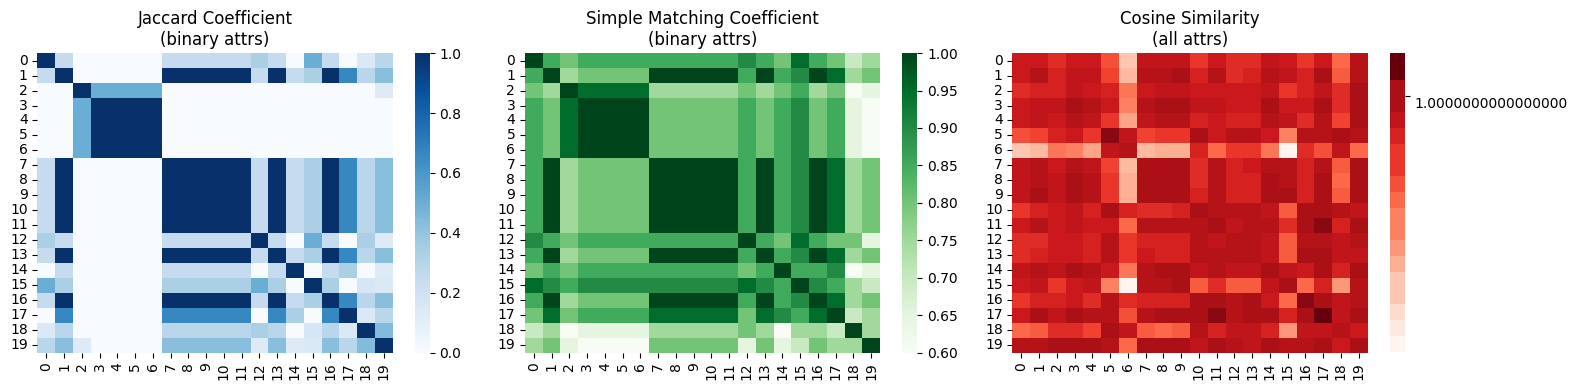

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')

#Prepare for binary similarity (JC, SMC)

# Strictly find binary attributes (contain only 't' and 'f')
binary_cols = []
for col in df.columns:
    unique_vals = set(str(x).strip().lower() for x in df[col].dropna().unique())
    if unique_vals.issubset({'t','f'}):
        binary_cols.append(col)

# Ensure first 20 rows have only valid binary values in those columns
valid_binary_cols = []
for col in binary_cols:
    vals = df.loc[:19, col].apply(lambda x: str(x).strip().lower())
    if all(v in {'t','f'} for v in vals):
        valid_binary_cols.append(col)

bin_data = df.loc[:19, valid_binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == 't' else 0).values

# Compute Jaccard and SMC matrices
def jaccard(u, v):
    f11 = np.sum((u==1) & (v==1))
    f10 = np.sum((u==1) & (v==0))
    f01 = np.sum((u==0) & (v==1))
    denom = f11 + f10 + f01
    return f11 / denom if denom else 0

def simple_match(u, v):
    f11 = np.sum((u==1) & (v==1))
    f00 = np.sum((u==0) & (v==0))
    f10 = np.sum((u==1) & (v==0))
    f01 = np.sum((u==0) & (v==1))
    total = f11 + f00 + f10 + f01
    return (f11 + f00) / total if total else 0

n = bin_data.shape[0]
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        jc_matrix[i,j] = jaccard(bin_data[i], bin_data[j])
        smc_matrix[i,j] = simple_match(bin_data[i], bin_data[j])

#Prepare for Cosine similarity: encode all columns numerically
df_numeric = df.copy().iloc[:20]
for col in df_numeric.columns:
    if df_numeric[col].dtype == object:
        df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mode()[0])
        le = LabelEncoder()
        df_numeric[col] = le.fit_transform(df_numeric[col])
    else:
        df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mean())

cos_matrix = cosine_similarity(df_numeric.values)

#Visualization
plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
sns.heatmap(jc_matrix, annot=False, cmap='Blues')
plt.title('Jaccard Coefficient\n(binary attrs)')

plt.subplot(1,3,2)
sns.heatmap(smc_matrix, annot=False, cmap='Greens')
plt.title('Simple Matching Coefficient\n(binary attrs)')

plt.subplot(1,3,3)
sns.heatmap(cos_matrix, annot=False, cmap='Reds')
plt.title('Cosine Similarity\n(all attrs)')

plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------
#A8

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')

# Replace "?" with NaN for proper detection
df.replace("?", np.nan, inplace=True)

# Detect types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert possible numeric columns from object to float (since some numeric columns may contain '?')
maybe_numeric = []
for col in categorical_cols:
    try:
        df[col] = pd.to_numeric(df[col])
        maybe_numeric.append(col)
    except:
        pass

# Update type-wise column lists
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

# Handle missing values in numeric columns
print("\nNumeric column imputation:")
for col in numeric_cols:
    col_data = df[col].astype(float)
    if col_data.isnull().sum() == 0:
        continue

    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]

    if len(outliers) > 0:
        median_val = col_data.median()
        df[col].fillna(median_val, inplace=True)
        print(f"{col}: Filled with Median ({median_val:.2f}) due to outliers ({len(outliers)})")
    else:
        mean_val = col_data.mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"{col}: Filled with Mean ({mean_val:.2f}) - no outliers")

#Handle missing values in categorical columns
print("\nCategorical column imputation:")
for col in categorical_cols:
    if df[col].isnull().sum() == 0:
        continue
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
    print(f"{col}: Filled with Mode ('{mode_val}')")

print("\nMissing values filled successfully.")
print("Remaining nulls in dataset:", df.isnull().sum().sum()) 



Numeric column imputation:
TSH: Filled with Median (1.40) due to outliers (884)
T3: Filled with Median (1.90) due to outliers (360)
TT4: Filled with Median (104.00) due to outliers (422)
T4U: Filled with Median (0.96) due to outliers (420)
FTI: Filled with Median (109.00) due to outliers (501)
TBG: Filled with Median (26.00) due to outliers (29)

Categorical column imputation:
sex: Filled with Mode ('F')

Missing values filled successfully.
Remaining nulls in dataset: 0


C:\Users\sagar\AppData\Local\Temp\ipykernel_8224\2929090091.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\sagar\AppData\Local\Temp\ipykernel_8224\2929090091.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

----------------------------------------------------------------------------------------------------------------------------------------------------------
#A9

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load your data, replace "?" by NaN for numeric conversion
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/thyroidData.csv')
df.replace("?", np.nan, inplace=True)

# Attempt to convert any object columns to float if possible
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Check for outliers using the IQR method
def has_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum() > 0

# Prepare containers for normalized data
normalized_df = pd.DataFrame(index=df.index)

for col in numeric_cols:
    series = df[col].dropna()
    if not has_outliers(series):
        # Min-Max Scaling if no significant outliers
        scaler = MinMaxScaler()
        reshaped = df[[col]].values
        normalized_col = scaler.fit_transform(reshaped)
        normalized_df[col + '_minmax'] = normalized_col
    else:
        # Z-score (Standard Scaling) if outliers present
        scaler = StandardScaler()
        reshaped = df[[col]].values
        normalized_col = scaler.fit_transform(reshaped)
        normalized_df[col + '_zscore'] = normalized_col

#normalized_df contains all normalized numeric columns
print(normalized_df.head())


   Record ID_minmax  age_zscore  TSH_zscore  T3_zscore  TT4_zscore  \
0      0.000000e+00   -0.037634   -0.203386        NaN         NaN   
1      3.410871e-08   -0.037634   -0.149629  -0.079581    0.514377   
2      9.891527e-07   -0.027499         NaN        NaN         NaN   
3      6.934301e-05   -0.031722         NaN        NaN         NaN   
4      6.937712e-05   -0.035100         NaN        NaN         NaN   

   T4U_zscore  FTI_zscore  TBG_zscore  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN   -0.896428  
3         NaN         NaN   -0.183848  
4         NaN         NaN    0.291205  
